In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read the data
df = pd.read_excel('data.xlsx')

Time = df['Time'].values
RX1=df['RX1'].values
RX2=df['RX2'].values

H=[1/2,1j/2],[1j/2,1/2]
H=np.array(H)

H_inv=np.linalg.inv(H)

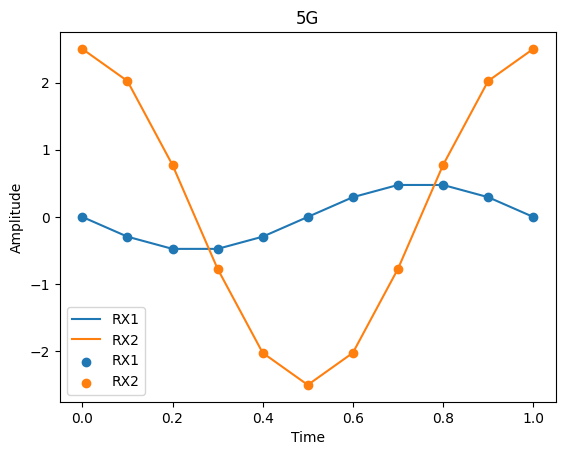

In [4]:
# Plot the data
plt.plot(Time, RX1, label='RX1')
plt.plot(Time, RX2, label='RX2')
plt.scatter(Time, RX1, label='RX1')
plt.scatter(Time, RX2, label='RX2')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('5G')

plt.legend()

plt.show()

In [5]:
maxAmplitudeRX1=np.max(RX1)
maxAmplitudeRX2=np.max(RX2)

print("Max Amplitude of RX1: ", maxAmplitudeRX1)
print("Max Amplitude of RX2: ", maxAmplitudeRX2)

Max Amplitude of RX1:  0.475528
Max Amplitude of RX2:  2.5


In [6]:
initialphaseRX1=0;
initialphaseRX2=0;

if RX1[0]==0:
    initialphaseRX1=np.pi
elif RX1[0]==maxAmplitudeRX1:
    initialphaseRX1=np.pi/2
else:
    initialphaseRX1=0

if RX2[0]==0:
    initialphaseRX2=np.pi
elif RX2[0]==maxAmplitudeRX2:
    initialphaseRX2=np.pi/2
else:
    initialphaseRX2=0



In [7]:
RealRX1=np.cos(2*np.pi*Time+initialphaseRX1)
ImaginaryRX1=np.sin(2*np.pi*Time+initialphaseRX1)

RealRX1=RealRX1*maxAmplitudeRX1
ImaginaryRX1=ImaginaryRX1*maxAmplitudeRX1

RealRX2=np.cos(2*np.pi*Time+initialphaseRX2)
ImaginaryRX2=np.sin(2*np.pi*Time+initialphaseRX2)

RealRX2=RealRX2*maxAmplitudeRX2
ImaginaryRX2=ImaginaryRX2*maxAmplitudeRX2

#to excel
df = pd.DataFrame({'Time': Time, 'RealRX1': RealRX1, 'ImaginaryRX1': ImaginaryRX1, 'RealRX2': RealRX2, 'ImaginaryRX2': ImaginaryRX2})
df.to_excel('5G.xlsx', sheet_name='5G', index=False)


In [8]:
RX1_Comp=RealRX1+1j*ImaginaryRX1
RX2_Comp=RealRX2+1j*ImaginaryRX2

#Complex*H_inv
TX1=RX1_Comp*H_inv[0][0]+RX2_Comp*H_inv[0][1]
TX2=RX1_Comp*H_inv[1][0]+RX2_Comp*H_inv[1][1]

TX1_Real=np.real(TX1)
TX1_Imaginary=np.imag(TX1)

TX2_Real=np.real(TX2)
TX2_Imaginary=np.imag(TX2)

#to excel
df = pd.DataFrame({'Time': Time, 'TX1_Real': TX1_Real, 'TX1_Imaginary': TX1_Imaginary, 'TX2_Real': TX2_Real, 'TX2_Imaginary': TX2_Imaginary})
df.to_excel('5G.xlsx', sheet_name='5G', index=False)


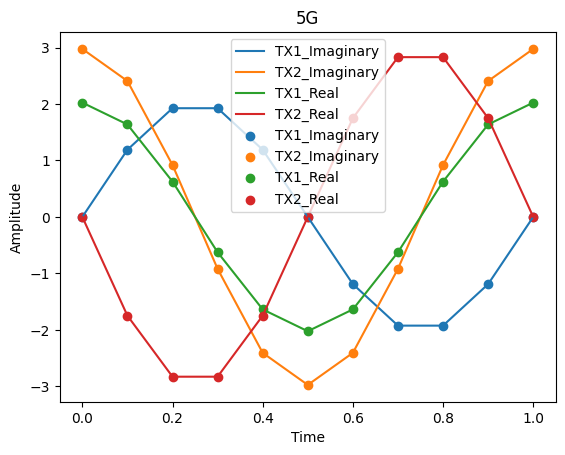

In [12]:
#plot TX1 and TX2 imaginary
plt.plot(Time, TX1_Imaginary, label='TX1_Imaginary')
plt.plot(Time, TX2_Imaginary, label='TX2_Imaginary')
plt.plot(Time, TX1_Real, label='TX1_Real')
plt.plot(Time, TX2_Real, label='TX2_Real')
plt.scatter(Time, TX1_Imaginary, label='TX1_Imaginary')
plt.scatter(Time, TX2_Imaginary, label='TX2_Imaginary')
plt.scatter(Time, TX1_Real, label='TX1_Real')
plt.scatter(Time, TX2_Real, label='TX2_Real')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('5G')

plt.legend()

plt.show()


In [10]:
print("Max Amplitude of TX1_Real: ", np.max(TX1_Real))
print("Max Amplitude of TX2_Real: ", np.max(TX2_Real))

Max Amplitude of TX1_Real:  2.024472
Max Amplitude of TX2_Real:  2.829895293818686
